# <span style="color:blue">Heaps
AWS CLOUD INSTITUTE: PROVIDED FOR EDUCATIONAL INSTRUCTIONAL PURPOSES ONLY.

A heap is a **data structure** used to **quickly find** the **smallest or largest** element. They are a special **type of binary tree**, which is a tree like data structure where nodes have at most two children.

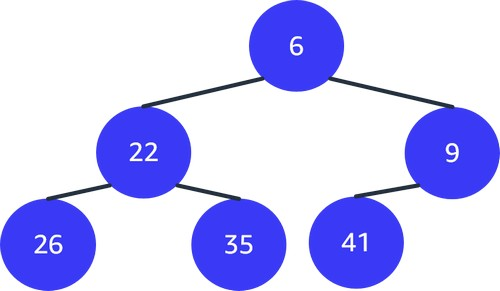

## Implementation
**Implementing** a **Heap**, **or** another type of **binary tree**, is something you **could do on your own, but** it's **time consuming**. 

As an **example** here, we will **build a different type of binary tree**. **Not** a **heap**. We will use a Python module to implement a heap later, but this example will show the type of approach we would use to build our own algorithm. We will use the **same approach** we saw for **linked lists**, using **Nodes with pointers**, and a class to support operations.

## Implementing a Binary Tree from Scratch

### TreeNode Class
You will see this is very **similar to** our **Linked List** node, **but** we have **left and right pointers** as opposed to prev and next.

In [ ]:
class TreeNode:
    '''
    Node for a binary tree
    '''
    def __init__(self, data):
        '''
        Parameters:
            data: The data to be stored in the node
            left: Pointer to the left child node
            right: Pointer to the right child node
        '''
        self.data = data
        self.left = None
        self.right = None
        
    def __str__():
        return self.data

### BasicTree Class
A **basic tree** would be **similar** to a **linked list**, but **instead of** a **head** pointer, it would have a **root pointer**, marking the top of the tree. **Elements** are then **added** to the **left** or the **right** depending on what kind of tree this is.

Again, please note that the **tree below** is **NOT a heap**. It's **not** a **complete binary tree**, and **does not try to satisfy** the **heap property**. As it so happens, what we are building is called a **binary search tree**, but we **won't go into that** now, because it's a **topic for a future module**. We just needed a simple example here.

In [ ]:
class BasicTree:
    '''
    A basic tree
    '''
    def __init__(self):
        # initialize the root of the tree
        self.root = None

    def _insert_node(self, new_node, curr_node):
        '''
        Recursive function that will keep looking for a leaf node to insert the new node at, recursevely calling 
        itself with the right or left sub-tree, depending on whether the value to insert is larger or smaller
        '''
        # if the new_node value is smaller, then try to insert on the left
        if (new_node.data < curr_node.data):
            # if there is no left child, insert it there
            if (not curr_node.left):
                curr_node.left = new_node
            # else, recursively look to insert on the left sub-tree
            else:
                self._insert_node(new_node, curr_node.left)
        # else, new node must be bigger, so try to insert on the right
        else:
            # if there is no right child, insert it there
            if (not curr_node.right):
                curr_node.right = new_node
            # else, recursevely try to insert on the right sub-tree
            else:
                self._insert_node(new_node, curr_node.right)

    def insert(self, data):
        '''
        Insert a node in the tree on the left if it's smaller, or right if it's larger.
        This will start at the root, and call an internal recursive metod.
        '''
        # create a new tree node
        new_node = TreeNode(data)

        # if tree is empty, simply insert node as the root
        if (self.root is None):
            self.root = new_node
        # else, starting at the root, call internal recursive function to to insert in the right place
        else:
            self._insert_node(new_node, self.root)

    def _to_str(self, curr_node, level):
        '''
        Recursive function that will print elements of a tree, indenting to the right based on level
        '''
        # initialize return string
        curr_str = ""
        
        # if the current node is not None ...
        if curr_node:
            # recusively add the right sub-tree, incresing the level (indentation)
            curr_str += self._to_str(curr_node.right, level + 1) 

            # add the data in this node
            curr_str += "         " * level + str(curr_node.data) + "\n"

            # recusively add the left sub-tree, incresing the level (indentation)
            curr_str += self._to_str(curr_node.left, level + 1)

        # return string for this node/sub-tree
        return curr_str
                

    def __str__(self):
        '''
        Call internal method that will recursively print all nodes, starting with the root
        '''
        # starting add the root, generate string recursively
        return self._to_str(self.root, 0)

#### Creating my Binary Tree

In [ ]:
# create a new binary tree
my_btree = BasicTree()

#### Adding elements to my tree

In [ ]:
# add data to the tree
my_btree.insert("Lexi")
my_btree.insert("Finn")
my_btree.insert("Sammy")
my_btree.insert("Tucker")
my_btree.insert("Rebecca")
my_btree.insert("Max")

#### Printing the current tree
**At this point**, if we work it out **with pen and paper**, and look at the algorithm for inserting nodes, the **tree would look like this**. Note that this is **not a complete binary tree**, because all the **levels are not filled out uniformly**. 

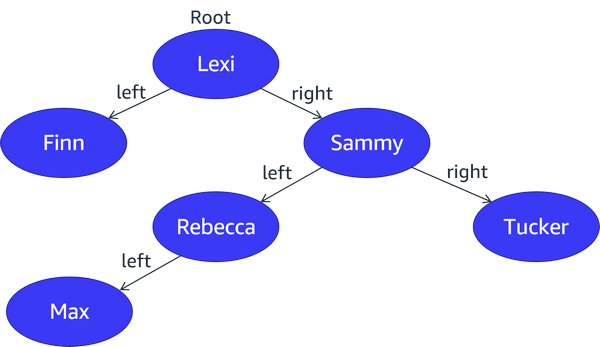

It's **possible to implement** a print **algorithm** that would **resemble that, but** it would take a **lot of work**. We have a **simple \_\_str\_\_ method** that tries to **approximate the structure** by **indenting** the **nodes** **according to their level**. You can try to visualize it as a tree layed on its side. Even that simplistic implementation **required** the use of **recursion**, which is a technique we have not discussed.

In [ ]:
# print current list
print(my_btree)

## Implementing a Min Heap using the heapq Module
We just **saw** the **complexities** of **implementing** a **Binary Tree** from scratch, and implementing a **Heap** would be **even more work**. That's because the tree above didn't have to be readjusted. We just kept adding nodes, following the "left smaller/right bigger" rule. For a **min heap**, we would have to **keep readjusting** the tree, such that the **smallest element** was always the **root**, and reorganize all the nodes to **maintain** the **complete binary tree** format.

Instead of trying all of that, we will have the **Python heapq module do** all **the hard work**.

### Heap arrray representation
Recall that a heap can be represented as an array, following these rules:
- Root is at index 1
- For a node at index i, the left child is at index 2 * i
- For a node at index i, the right child is at index (2 * i) + 1


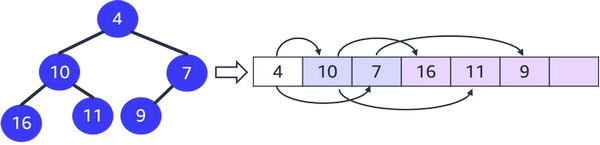

### Python heapq Module
The **[Python heapq module](https://docs.python.org/3/library/heapq.html)** provides an **implementation of** the **heap queue algorithm**. **heapq implements** a **min heap**. We will discuss later an approach to use it for a max heap.

When we say it's "implementing the algorithm", is because **heapq** is **not** a **self-contained heap data structure**. It **operates on** a regular **Python list**, such that the **list** will **behave as** a **heap**. The **Python list** will **represent** a **heap** using the **standard array representation** seen above.

In [ ]:
import heapq as heap

### Creating a min heap with heapq

#### Create an random list of numbers, and make a copy so we can modify it

In [ ]:
# original list with random numbers
original_list = [34, 72, -12, 13, 45, -6, 28]

# make a copy of the original list, which will eventually become our min heap
min_heap = original_list.copy()

# print original list
print(f"Original list: {original_list}")

#### Use heapq to *heapify* the list

In [ ]:
heap.heapify(min_heap)

##### Compare original list with heapified min_heap

In [ ]:
# print original list
print(f"Original list: {original_list}")

# print heapified min heap (add some extra space in case we want to draw)
print(f"\n\nMin heap: {min_heap}\n\n")

We may need pen and paper to **visually** if the new **list** was correctly **made into a heap**, **remembering** the **rule** for **how heaps** are **represented as arrays**.

### Operating a min heap with heapq
Remember, building the heap is only half the battle. **Readjusting** the **list** to **maintain** the **heap structure** when we add or remove items, is where a **lot of** the extra **work** is. The **heapq** module will also handle that.

#### Popping the smallest item

In [ ]:
smallest_item = heap.heappop(min_heap)
print(f"Popped smallest element from heap: {smallest_item}")
print(f"\nUpdated min heap: {min_heap}\n")

#### Pushing some new items

In [ ]:
# push some new items to the heap
heap.heappush(min_heap, 21)
heap.heappush(min_heap, -14)
heap.heappush(min_heap, 53)

print(f"\nUpdated min heap: {min_heap}\n")

It's getting harder to quickly visualize, but next couple of functions might help confirm everything is working

#### Retrieving smallest and largest items
**heapq** has **methods** that will allow you to **retrieve** (without removing) the **largest** and the **smallest** items.

In [ ]:
# retrieve and print the top 3 smallest items
smallest_items = heap.nsmallest(3, min_heap)
print(f"Smallest 3 items: {smallest_items}")

# retrieve and print the top 5 largest items
largest_items = heap.nlargest(5, min_heap)
print(f"Largest 5 items: {largest_items}")

### Using heapq for a Max Heap
Although **heapq implements** a **min heap**, we **can use** a little **"trick"** to use it **for** a **max heap**. All we need to do is **invert** the **values** of **every item** (from negative to positive, and positive to negative) when we **hepify or push**. Then we **revert back** when we **retrieve it**.

Let's quickly look at the example below.

#### Creating a max heap from the same original list

In [ ]:
# make another copy of the original list, which will eventually become our max heap
max_heap = original_list.copy()

# print original list
print(f"Original list: {original_list}")

#### Negate every item in the list
We use list comprehension to invert the sign of every number in the original list.

In [ ]:
max_heap = [ -x for x in max_heap]
print(f"\nUpdated nagated list: {max_heap}\n")

**As is**, **this new list** does **not** satisfy either the **min heap or max heap** property. **But** we have it r**eady for the next step ...**

#### Use heapq to *heapify* the list

In [ ]:
heap.heapify(max_heap)

##### Compare original list with heapified min_heap

In [ ]:
# print original list
print(f"Original list: {original_list}")

# print heapified min heap
print(f"Max heap: {max_heap}")

The **looks right. Sort of**. We can see the **first element** (-72 in my original example), which **is the largest** number in original list, **but** it **shows with the sign reversed**. So we'll have to **handle** that **when we retrieve** it.

### Operating on the improvised max heap
We'll **use the same operations** on our "max heap", since it's actually a min heap. But we'll **need to reverse the signs when** we want to **show results**. 

#### Popping the "largest" item
We put largest in quotes, because it's really the smallest after we inverted, but we can just **invert it** back **in the way out**.

In [ ]:
# pop the largest item from the heap, reversing the sign
largest_item = -(heap.heappop(max_heap))
print(f"Popped largest element from heap: {largest_item}")

#### Pushing some new items
We push new items with the same *heappush* operation, but we'll have to **invert it in the way in, to maintain our "trick"**

In [ ]:
# define new items for my heap (the first one is a new max)
new_item1 = 101
new_item2= -20

# push items, but add a "-" before them to invert the sign
heap.heappush(max_heap, -new_item1)
heap.heappush(max_heap, -new_item2)
print(f"\nUpdated max heap: {max_heap}\n")

**Inverting** the **values back and forth** may be a little **awkward**. **If** we **want to make it nicer**, we can **wrap** that **around our own class**. If you want to see that, we have an **exmaple implementation** of it in the **optional section** of this notebook.

### Heaps with different data types
We've been **using examples with integers**, because they are the **easiest to visualize**, and are commonly used with heaps. However you **can use heap** structures for **anything** where the concept of **smaller or larger applies**.

#### A heap for strings
A heap with strings will simply put the lowest string in alphabetical order in front, and so on.

##### Create a string heap

In [ ]:
# create a list with strings, which we will turn into a heap
str_heap = ["Richard", "Fernando", "Krishna", "Jason", "Dima", "Ava"]
print(f"Original string list: {str_heap}")

# heapify the list and print
heap.heapify(str_heap)
print(f"Heapified string list: {str_heap}")

##### Perform push and pop operations

In [ ]:
# pop smallest name alphabetically
smallest_name = heap.heappop(str_heap)
print(f"Popped smallest name: {smallest_name}")
print(f"Updated string heap: {str_heap}\n")

# insert a couple names
heap.heappush(str_heap, "Aniekan")
heap.heappush(str_heap, "Nikki")
print(f"Added two new names.")
print(f"Updated string heap: {str_heap}\n")

# pop next smallest name alphabetically
smallest_name = heap.heappop(str_heap)
print(f"Popped smallest name: {smallest_name}")
print(f"Updated string heap: {str_heap}\n")


### Heaps with Custom Classes
We mentioned **can use heap** structures for **anything** where the concept of **smaller or larger applies**. So if you have your **own class**, you can use a **heap to organize items** as long as the class **has** a formal **definition** of the **"<" operator**, so the heapq class can sort it.

We have an **example** of that in the **optional section** of the Notebook.

# <span style="color:blue"> OPTIONAL

## Example of Heaps with Custom Classes
We mentioned earlier that we can use heaps for any class that has an operator < defined. Let's look at an example here.

### Fastest Laps in a Race
In racing, drivers do several laps to decide on the starting line up for the race. In our example, we want to quickly **record timing for multiple laps for racers**, and **quickly get the top laps at any point**.

#### The LapTime Class
This class will store the result of a Lap for a racer.

In [ ]:
class LapTime:
    '''
    A class to store the result of a lap for a racer.
    '''
    def __init__(self, racer, time):
        '''
        Constructor to initialize a LapTime object.
        '''
        self.racer = racer
        self.time = time

    def __lt__(self, other):
        '''
        Define a lap is less than another based on the lap time
        '''
        return self.time < other.time

    def __str__(self):
        '''
        String representation of the LapTime object.
        '''
        # return string, with name left justfied and padded to 16 characters
        return f"{self.racer: <16} - Lap time: {self.time} seconds"

#### Create a list of racers
We'll create a list of racers. In this case, we're using racers from the 2024 Formula 1 season.

In [ ]:
f1_racers = [
	"Max Verstappen",
	"Lando Norris",
	"Charles Leclerc",
	"Carlos Sainz",
	"Oscar Piastri",
	"Sergio Perez",
	"George Russell",
	"Lewis Hamilton",
	"Fernando Alonso",
	"Lance Stroll",
	"Nico Hulkenberg",
	"Yuki Tsunoda",
	"Daniel Ricciardo",
	"Oliver Bearman",
	"Pierre Gasly",
	"Kevin Magnussen",
	"Alexander Albon",
	"Esteban Ocon",
	"Zhou Guanyu",
	"Logan Sargeant",
	"Valtteri Bottas"
]

#### Generate random lap times for all the racers, and collect them in a list
**Assume** the viable range of a **lap** in this race is **between 120 and 130 seconds**. We will **generate random lap times** (up to millisecond in precision) in that range, using the Python *random* module, and **assign** them **to racers**.

In [ ]:
import random
racer_laps = []

# iterate to list of racers
for racer_name in f1_racers:
    # generate a random lap times between 120.000 and 130.000 seconds
    lap_time = round(random.uniform(120, 130), 3)

    # create a lapTime object for this racer
    racer_lap = LapTime(racer_name, lap_time)

    # append the lap to the list
    racer_laps.append(racer_lap)

#### List all of the unsorted racer laps

In [ ]:
for lap in racer_laps:
    print(lap)

#### Heapify the list of racer laps

In [ ]:
# Heapify the list of racer laps
heap.heapify(racer_laps)

# print updated list
for lap in racer_laps:
    print(lap)

That **seems to work**. Remember, this is **not** a **sorted order**, but a tree structure. However we can see the **first element**, which is the **root of the heap**, is the **smallest (fastest) lap**.

#### Print the Top 10 Fastest Laps

In [ ]:
# retrieve the top 10 smallest element from our heap
top_10_fastest_laps = heap.nsmallest(10, racer_laps)

# print the top 10 fastest laps
print("Top 10 Fastest Laps:")
for lap in top_10_fastest_laps:
    print(lap)

## Max Heap Class with heapq
We discussed earlier that we **use** the **heapq** module to **implement** a **max heap**, by using a technique of **inverting values** in the way in, then reverting that in the way out. If we want to **hide that complexity** from the user, we can **create our own class** to do that. 

All of the **actual complexity of heapifying** the lists is **still done** my the **heapq module**. We're **just handling** the simple **sign conversions**, but that will make the usage a lot more intuitive.

### The MaxHeap Class

In [ ]:
import heapq as heap

class MaxHeap:
    '''
    Implements a max heap by using the heapq library, and inverting values when we perform operations.
    '''

    def __init__(self, list):
        '''
        Constructs the max heap by inverting the values in the list, and then heapifying the list.
        '''
        self.heap = [-x for x in list]
        heap.heapify(self.heap)

    def push(self, item):
        '''
        Pushes an item onto the heap, inverting the value in the way in
        '''
        heap.heappush(self.heap, -item)

    def pop(self):
        '''
        Pops the largest item from the heap, by inverting in the way out
        '''
        return -heap.heappop(self.heap)

    def nlargest(self, n):
        '''
        Returns the n largest items from the heap. Since the items have been reversed, this will
        actually be the nsmallest, adn we'll reverse them in the way out
        '''
        return [-x for x in heap.nsmallest(n, self.heap)]

    def nsmallest(self, n):
        '''
        Returns the n smallest items from the heap
        '''
        return [-x for x in heap.nlargest(n, self.heap)]

    def __str__(self):
        '''
        Returns a string representation of the heap, inverting the values
        '''
        return str([-x for x in self.heap])

#### Using the MaxHeap class
We'll **repeat the same operations** we did earlier, but **without** the **need** of **inverting values**. All of that is hidden inside the MaxHeap class.

##### Creating a MaxHeap from the same original list

In [ ]:
max_heap = MaxHeap(original_list)

##### Compare the original list with our new MaxHeap

In [ ]:
print(f"Original list: {original_list}")
print(f"MaxHeap: {max_heap}")

Looking good so far, and nothing shows up inverted

##### Popping the largest item

In [ ]:
largest_item = max_heap.pop()
print(f"Popped largest element from heap: {largest_item}")
print(f"Updated MaxHeap: {max_heap}")

##### Pushing some new items

In [ ]:
# push some new items to the heap
max_heap.push(101)
max_heap.push(-20)
max_heap.push(52)
max_heap.push(19)
print(f"Updated max heap: {max_heap}")

##### Retrieving smallest and largest items

In [ ]:
# retrieve and print the top 3 smallest items
smallest_items = max_heap.nsmallest(3)
print(f"Smallest 3 items: {smallest_items}")

# retrieve and print the top 5 largest items
largest_items = max_heap.nlargest(5)
print(f"Largest 5 items: {largest_items}")